## Setup

In [1]:
# %matplotlib widget

from pyCascade import probePost, physics
from matplotlib import pyplot as plt
import numpy as np

run = 1
category =  "single_family"


In [2]:
# ############ CLUSTER ################
# scratch_dir = '/scratch/users/nbachand/Cascade/city_block_cfd'
# home_dir = '/home/users/nbachand/Cascade/city_block_cfd'

########### LOCAL ###################
home_dir = '/home/nbachand/Documents/Cascade/city_block'
scratch_dir = home_dir

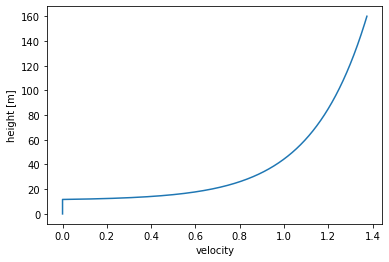

In [3]:
LES_params = {
    'uStar': 0.1,
    'z0': 0.61,
    'disp': 11.1,
    'vK_const': 0.4,
    'Dt': .01,
    'z_values' : np.linspace(0,160,1600)
}
physics_setup = physics.LES_Physics(LES_params)
physics_setup.plot_log_wind()

In [4]:
physics_setup.calc_flatplate_quantities(
    rho = 1.224,
    mu = 1.7894e-5,
    yPlus = 500
    )




U infinity is 1.374392815376186 with L = 160.0
flat plate Reynolds number is 15041974.346891265
wall spacing is 0.15187213520993692 for y+ of 500


In [5]:
probes = probePost.Probes(f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut')
probes.get_locations(f'{scratch_dir}/CHARLES/{category}/R{run}/probes/locations')

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 3 seconds
memorizing data took 0 seconds
plotting took 6 seconds


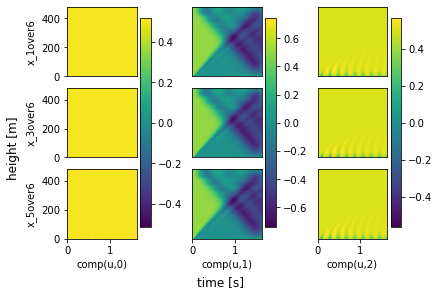

In [6]:
plot_params = {
    'plot_levels' : {
        # 'comp(u,0)' : np.linspace(0,.5,256),
        # 'comp(u,2)' : np.linspace(-1,1,256)
    },
    'horizontal spacing' : physics_setup.LES_params['Dt'],
    'stack span' : 'y',
    'xlabel': 'time [s]',
    'ylabel' : 'height [m]',
    'ColorNorm': 'Centered'
}

# slice = probes.slice_into_df(slice_params)
(fig, ax) = probes.contour_plots(
#     names = ['x_1over6','x_3over6'], 
    # steps = probes.probe_steps[-10000:],
#     quants = ['comp(u,2)'],
    parrallel = True,
    plot_params = plot_params
    )


In [6]:
# plt.savefig(f'{home_dir}/CHARLES/R{run}/plots/velocity_contour')

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 3 seconds
memorizing data took 1 seconds
processing data took 0 seconds
plotting took 20 seconds


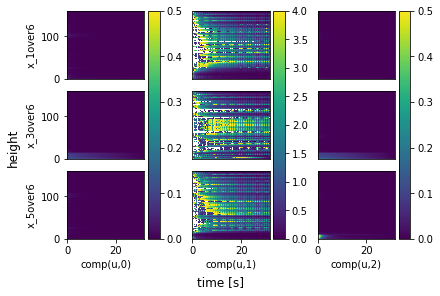

In [9]:
plot_params = {
    'plot_levels' : {
        'comp(u,0)' : np.linspace(0,.5,200),
        'comp(u,1)' : np.linspace(0,4,200),
        'comp(u,2)' : np.linspace(0,.5,200)
    },
    'horizontal spacing' : physics_setup.LES_params['Dt'],
    'stack span' : 'y',
    'xlabel': 'time [s]',
    'ylabel' : 'height'
}

# slice = probes.slice_into_df(slice_params)
(fig, ax) = probes.contour_plots(
    # names = ['x_1over6','x_3over6'], 
    # steps = probes.probe_steps[:1000],
#     quants = ['comp(u,0)', 'comp(u,1)'],
    parrallel = True,
    processing = [probePost.mean_convergence],
    plot_params = plot_params
    )

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 1 seconds
memorizing data took 0 seconds


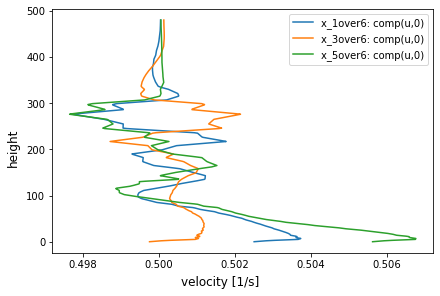

In [9]:
probes.profile_plots(
    # names = ['x_3over6'],
    steps = probes.probe_steps[-1],
    quants = ['comp(u,0)'],
    plot_params = {
        'stack span' : 'y',
        'xlabel': 'velocity [1/s]',
        'ylabel' : 'height'
        },
    parrallel=True
    )